# The Sequential model API

## Coding tutorials
#### [1. Building a Sequential model](#coding_tutorial_1)
#### [2. Convolutional and pooling layers](#coding_tutorial_2)
#### [3. The compile method](#coding_tutorial_3)
#### [4. The fit method](#coding_tutorial_4)
#### [5. The evaluate and predict methods](#coding_tutorial_5)

In [1]:
import tensorflow as tf
print(tf.__version__)
# Check GPU available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.compat.v1.InteractiveSession(config=config)
# tf.config.list_physical_devices('GPU')

2.2.0


***
## Load the data

In [2]:
from tensorflow.keras.preprocessing import image

# Load the Fashion-MNIST data
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

# Print the shape of the training data
print("Train data shape: {}".format(train_images.shape))

# Define the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train label at 0:", train_labels[0])

Train data shape: (60000, 28, 28)
Train label at 0: 9


In [3]:
# Rescale the image values so that they lie in between 0 and 1
train_images = train_images / 255.
test_images = test_images / 255.

label: Coat


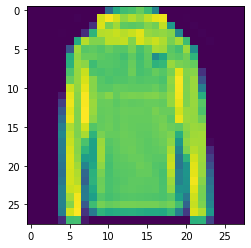

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Display one of the images
i = 24
img = train_images[i,:,:]
print(f"label: {labels[train_labels[i]]}")
plt.imshow(img)
plt.show()

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

#### Build a feedforward neural network model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the sequential feedforward neural network model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16, activation='relu', name='layer_1'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.weights

[<tf.Variable 'layer_1_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-8.00086483e-02,  3.92430127e-02,  6.03000224e-02, ...,
         -5.54770231e-05,  8.10685158e-02,  2.75704637e-02],
        [-7.32537881e-02, -1.30039155e-02,  2.04060748e-02, ...,
          4.66277450e-02,  6.96682632e-02, -1.11760795e-02],
        [ 5.73785603e-03,  2.93411314e-03,  7.01201558e-02, ...,
         -3.78265642e-02,  7.08384663e-02,  7.97281265e-02],
        ...,
        [ 6.33529425e-02,  8.13919753e-02, -3.54018286e-02, ...,
         -5.15392497e-02,  4.45084125e-02, -6.30342737e-02],
        [ 5.70297688e-02,  6.92313313e-02, -8.60603079e-02, ...,
          6.43066019e-02,  4.48812842e-02,  7.87836909e-02],
        [ 2.59600282e-02, -6.78908080e-02,  4.97385710e-02, ...,
          4.65915352e-02, -8.36766213e-02, -1.53309256e-02]], dtype=float32)>,
 <tf.Variable 'layer_1_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [6]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=5e-3)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
topk = tf.keras.metrics.SparseTopKCategoricalAccuracy()

model.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=[acc, topk])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [7]:
import numpy as np 

# Fit the model
history = model.fit(train_images, train_labels,
    epochs=8, batch_size=32, verbose=2)

Epoch 1/8
1875/1875 - 4s - loss: 0.6096 - sparse_categorical_accuracy: 0.7942 - sparse_top_k_categorical_accuracy: 0.9912
Epoch 2/8
1875/1875 - 4s - loss: 0.4470 - sparse_categorical_accuracy: 0.8399 - sparse_top_k_categorical_accuracy: 0.9963
Epoch 3/8
1875/1875 - 4s - loss: 0.4233 - sparse_categorical_accuracy: 0.8480 - sparse_top_k_categorical_accuracy: 0.9963
Epoch 4/8
1875/1875 - 4s - loss: 0.4077 - sparse_categorical_accuracy: 0.8544 - sparse_top_k_categorical_accuracy: 0.9966
Epoch 5/8
1875/1875 - 4s - loss: 0.4015 - sparse_categorical_accuracy: 0.8557 - sparse_top_k_categorical_accuracy: 0.9969
Epoch 6/8
1875/1875 - 4s - loss: 0.3912 - sparse_categorical_accuracy: 0.8595 - sparse_top_k_categorical_accuracy: 0.9970
Epoch 7/8
1875/1875 - 4s - loss: 0.3903 - sparse_categorical_accuracy: 0.8596 - sparse_top_k_categorical_accuracy: 0.9969
Epoch 8/8
1875/1875 - 4s - loss: 0.3842 - sparse_categorical_accuracy: 0.8631 - sparse_top_k_categorical_accuracy: 0.9970


       loss  sparse_categorical_accuracy  sparse_top_k_categorical_accuracy
0  0.609553                     0.794167                           0.991200
1  0.447030                     0.839917                           0.996317
2  0.423309                     0.848017                           0.996350
3  0.407675                     0.854400                           0.996650
4  0.401496                     0.855667                           0.996867


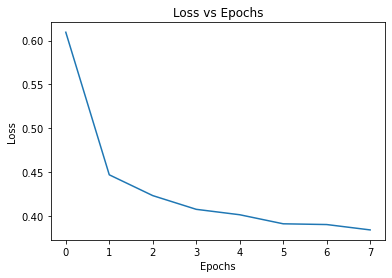

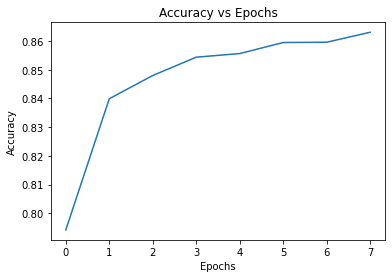

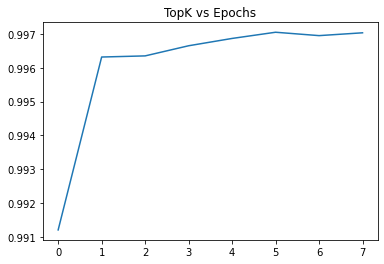

In [8]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="sparse_top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [9]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images, 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.4254 - sparse_categorical_accuracy: 0.8494 - sparse_top_k_categorical_accuracy: 0.9958


#### Make predictions from the model

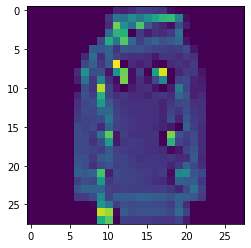

Label: Pullover
Model predictions: Coat


In [12]:
# Choose a random test image

random_idx = np.random.choice(test_images.shape[0])
test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...])
print(f"Model predictions: {labels[np.argmax(pred)]}")

***
<a id="coding_tutorial_2"></a>
## Convolution and pooling layers
#### Build a convolutional neural network model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [14]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=5e-3)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
topk = tf.keras.metrics.SparseTopKCategoricalAccuracy()

model.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=[acc, topk])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [15]:
import numpy as np 

# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels,
    epochs=8, batch_size=32, verbose=2)

Epoch 1/8
1875/1875 - 4s - loss: 0.4438 - sparse_categorical_accuracy: 0.8414 - sparse_top_k_categorical_accuracy: 0.9952
Epoch 2/8
1875/1875 - 4s - loss: 0.3398 - sparse_categorical_accuracy: 0.8787 - sparse_top_k_categorical_accuracy: 0.9977
Epoch 3/8
1875/1875 - 4s - loss: 0.3120 - sparse_categorical_accuracy: 0.8882 - sparse_top_k_categorical_accuracy: 0.9985
Epoch 4/8
1875/1875 - 4s - loss: 0.2958 - sparse_categorical_accuracy: 0.8928 - sparse_top_k_categorical_accuracy: 0.9988
Epoch 5/8
1875/1875 - 4s - loss: 0.2863 - sparse_categorical_accuracy: 0.8949 - sparse_top_k_categorical_accuracy: 0.9991
Epoch 6/8
1875/1875 - 4s - loss: 0.2723 - sparse_categorical_accuracy: 0.9009 - sparse_top_k_categorical_accuracy: 0.9991
Epoch 7/8
1875/1875 - 4s - loss: 0.2660 - sparse_categorical_accuracy: 0.9025 - sparse_top_k_categorical_accuracy: 0.9994
Epoch 8/8
1875/1875 - 4s - loss: 0.2605 - sparse_categorical_accuracy: 0.9055 - sparse_top_k_categorical_accuracy: 0.9994


       loss  sparse_categorical_accuracy  sparse_top_k_categorical_accuracy
0  0.443782                     0.841417                           0.995217
1  0.339793                     0.878667                           0.997700
2  0.311964                     0.888233                           0.998550
3  0.295822                     0.892817                           0.998817
4  0.286278                     0.894850                           0.999067


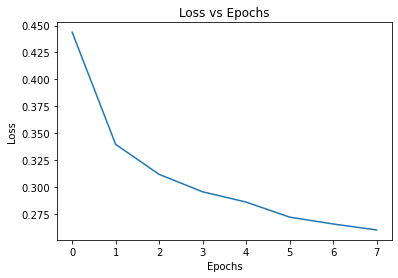

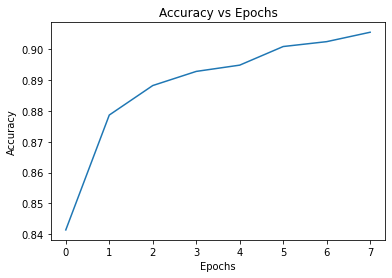

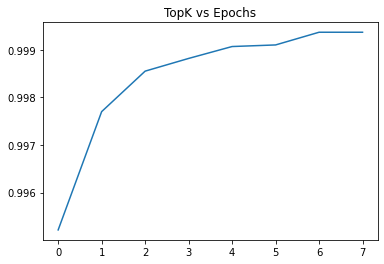

In [16]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="sparse_top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [17]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images[...,np.newaxis], 
    test_labels, verbose=2)

313/313 - 2s - loss: 0.3225 - sparse_categorical_accuracy: 0.8850 - sparse_top_k_categorical_accuracy: 0.9979


#### Make predictions from the model

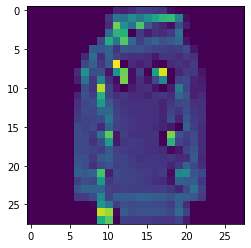

Label: Pullover
Model predictions: Pullover


In [18]:
# Choose a random test image

test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model predictions: {labels[np.argmax(pred)]}")